In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
plt.rcParams.update({"text.usetex": True})

In [2]:
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df_subconjunto = df[df.Species.isin(["versicolor", "virginica"])].copy()
df_subconjunto.Species = df_subconjunto.Species.map({"versicolor": 0, "virginica": 1})
df_subconjunto.columns = [c.replace('.', '_') for c in df_subconjunto.columns]
df_subconjunto.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [5]:
modelo = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subconjunto)
resultado = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [6]:
print(resultado.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.8517
Time:                        17:34:37   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -45.2723     13.612     -3.326      0.001     -71.951     -18.594
Petal_Length     5.7545      2.306      2.496      0.013       1.235      10.274
Petal_Width     10.4467      3.756      2.78

In [7]:
n_datos = 20
amplitud = 1.2
np.random.seed(1729)
df_nuevo = pd.DataFrame({"Petal_Length": np.random.randn(n_datos) * amplitud + 5,
                         "Petal_Width": np.random.rand(n_datos) * amplitud + 1.1})
df_nuevo["Species_pred"] = resultado.predict(df_nuevo)
print(df_nuevo["Species_pred"].head(3))
df_nuevo["Species_pred"] = (df_nuevo["Species_pred"] > 0.5).astype(int)
df_nuevo["Species_pred"].head(3)

0    0.004483
1    0.078261
2    0.999989
Name: Species_pred, dtype: float64


0    0
1    0
2    1
Name: Species_pred, dtype: int64

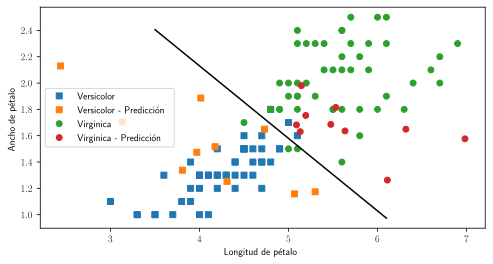

In [8]:
parametros = resultado.params
# Parámetros de la recta que define la separación de especies
a = -parametros['Intercept']/parametros['Petal_Width']
b = -parametros['Petal_Length']/parametros['Petal_Width']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(df_subconjunto[df_subconjunto.Species == 0].Petal_Length.values, 
        df_subconjunto[df_subconjunto.Species == 0].Petal_Width.values,
        's', label='Versicolor')
ax.plot(df_nuevo[df_nuevo.Species_pred == 0].Petal_Length.values, 
        df_nuevo[df_nuevo.Species_pred == 0].Petal_Width.values,
        's', label='Versicolor - Predicción')
ax.plot(df_subconjunto[df_subconjunto.Species == 1].Petal_Length.values, 
        df_subconjunto[df_subconjunto.Species == 1].Petal_Width.values,
        'o', label='Virginica')
ax.plot(df_nuevo[df_nuevo.Species_pred == 1].Petal_Length.values, 
        df_nuevo[df_nuevo.Species_pred == 1].Petal_Width.values,
        'o', label='Virginica - Predicción')
x = np.array([3.5, 6.1])
ax.plot(x, a + b * x, 'k')
ax.set_xlabel('Longitud de pétalo')
ax.set_ylabel('Ancho de pétalo')
plt.legend()
plt.show()

In [9]:
df = pd.read_csv('DoctorVisits.csv', header=0, infer_datetime_format=True, parse_dates=[0], 
                 index_col=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 1 to 5190
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     5190 non-null   int64  
 1   gender     5190 non-null   object 
 2   age        5190 non-null   float64
 3   income     5190 non-null   float64
 4   illness    5190 non-null   int64  
 5   reduced    5190 non-null   int64  
 6   health     5190 non-null   int64  
 7   private    5190 non-null   object 
 8   freepoor   5190 non-null   object 
 9   freerepat  5190 non-null   object 
 10  nchronic   5190 non-null   object 
 11  lchronic   5190 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 527.1+ KB


In [10]:
df['visits'].value_counts()

0    4141
1     782
2     174
3      30
4      24
7      12
6      12
5       9
8       5
9       1
Name: visits, dtype: int64

In [11]:
modelo = smf.poisson("visits ~ 1", data=df)
resultado = modelo.fit()
resultado.summary()

Optimization terminated successfully.
         Current function value: 0.767475
         Iterations 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 visits   No. Observations:                 5190
Model:                        Poisson   Df Residuals:                     5189
Method:                           MLE   Df Model:                            0
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:              -2.220e-16
Time:                        17:34:40   Log-Likelihood:                -3983.2
converged:                       True   LL-Null:                       -3983.2
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1982      0.025    -47.416      0.000      -1.248      -1.149
==============================================================================
"""

In [12]:
lam = np.exp(resultado.params)
print(lam)
X = stats.poisson(lam)
X_ci_l = stats.poisson(np.exp(resultado.conf_int().values)[0,0])
X_ci_u = stats.poisson(np.exp(resultado.conf_int().values)[0,1])

Intercept    0.301734
dtype: float64


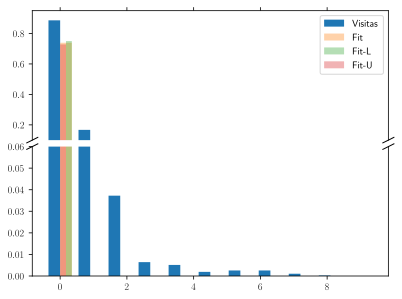

In [13]:
v, k = np.histogram(df.visits, density=True)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
width = 0.35
for ax in (ax1, ax2):
    ax.bar(k[:-1]-width/2, v, width, align='center', label='Visitas',alpha=1)
    ax.bar(k+width/2, X.pmf(k), width, align='center', label='Fit',alpha=0.35)
    ax.bar(k+width/2, X_ci_l.pmf(k), width/2, align='edge', label='Fit-L',alpha=0.35)
    ax.bar(k+width/2, X_ci_u.pmf(k), -width/2, align='edge', label='Fit-U',alpha=0.35)
ax1.set_ylim(0.1, 0.95)
ax2.set_ylim(0, 0.06)
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()
d = .5  # proporción de extensión vertical a horizontal de la marca de separación
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.legend()
plt.show();


### Copyright 2020-2023 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

